# 1.Data Exploration

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Checking for null values

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Plot some numerical features

In [ ]:
count = df["Class"].value_counts()
print(count/len(df))

Fraud = df[df['Class'] == 1]
Fraud.shape

0    0.998273
1    0.001727
Name: Class, dtype: float64


(492, 31)

<ipython-input-7-cd7978c83e93>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_1 = sns.distplot(df['Time'].values/(60*60), color = 'yellow')


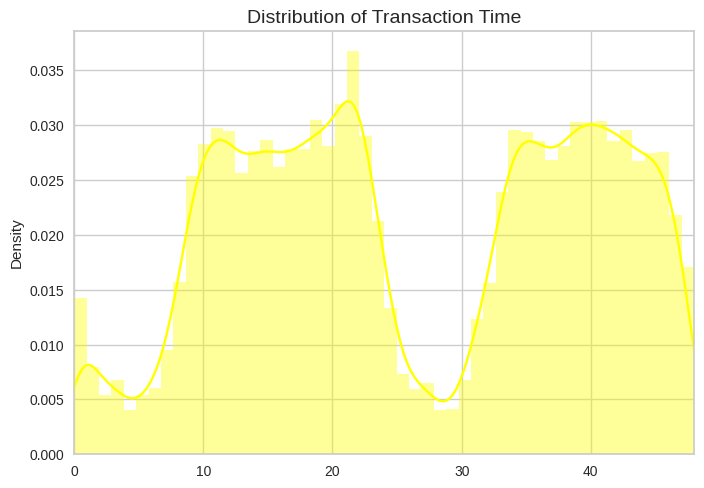

<ipython-input-7-cd7978c83e93>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_2 = sns.distplot(df['Amount'].values, color = 'blue')


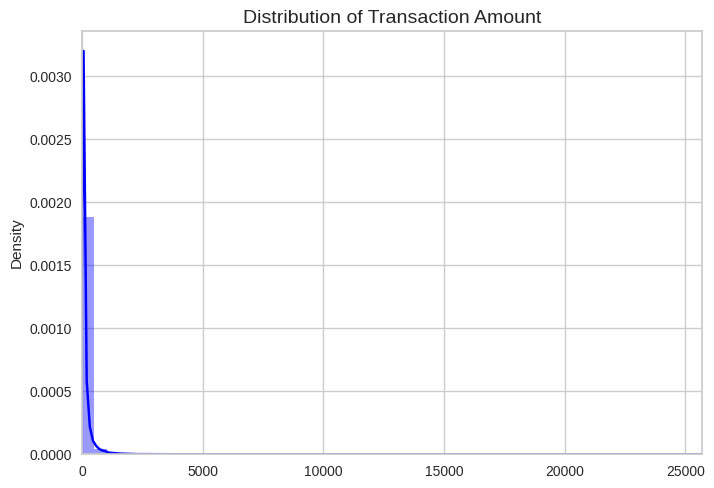

In [ ]:
ax_1 = sns.distplot(df['Time'].values/(60*60), color = 'yellow')
ax_1.set_title('Distribution of Transaction Time', fontsize = 14)
ax_1.set_xlim([min(df['Time'].values/(60*60)), max(df['Time'].values/(60*60))])

plt.show()

ax_2 = sns.distplot(df['Amount'].values, color = 'blue')
ax_2.set_title('Distribution of Transaction Amount', fontsize = 14)
ax_2.set_xlim([min(df['Amount'].values), max(df['Amount'].values)])

plt.show()

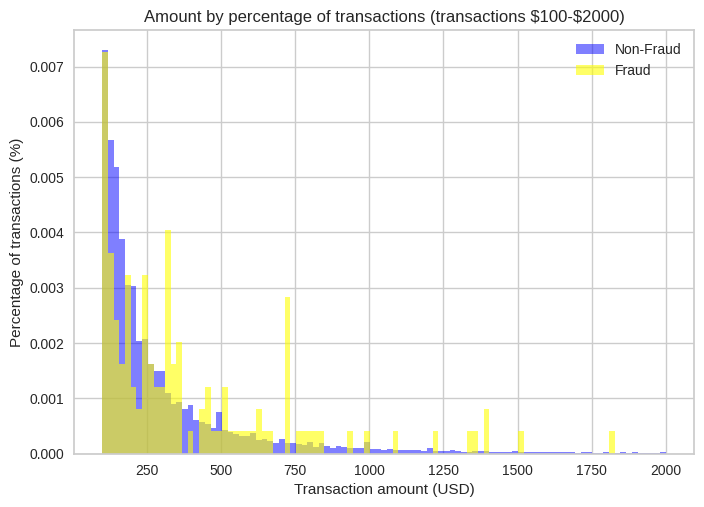

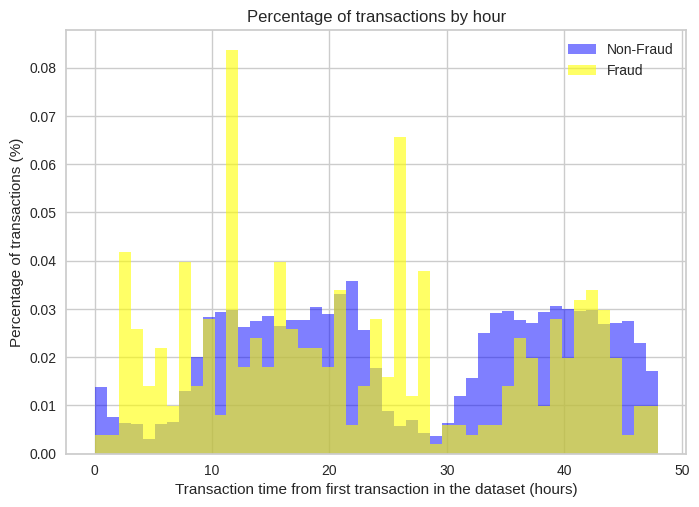

In [ ]:
df_n = df[df.Class == 0]
df_f = df[df.Class == 1]

bins = np.linspace(100, 2000, 100)
plt.hist(df_n.Amount, bins, alpha = 0.5, density = True, label = 'Non-Fraud', color = 'blue')
plt.hist(df_f.Amount, bins, alpha = 0.6, density = True, label = 'Fraud', color = 'yellow')
plt.legend(loc = 'upper right')
plt.title("Amount by percentage of transactions (transactions \$100-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()


bins = np.linspace(0, 48, 48) #48 hours
plt.hist((df_n.Time/(60*60)), bins, alpha = 0.5, density=True, label = 'Non-Fraud', color = 'blue')
plt.hist((df_f.Time/(60*60)), bins, alpha = 0.6, density = True, label = 'Fraud', color = 'yellow')
plt.legend(loc = 'upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

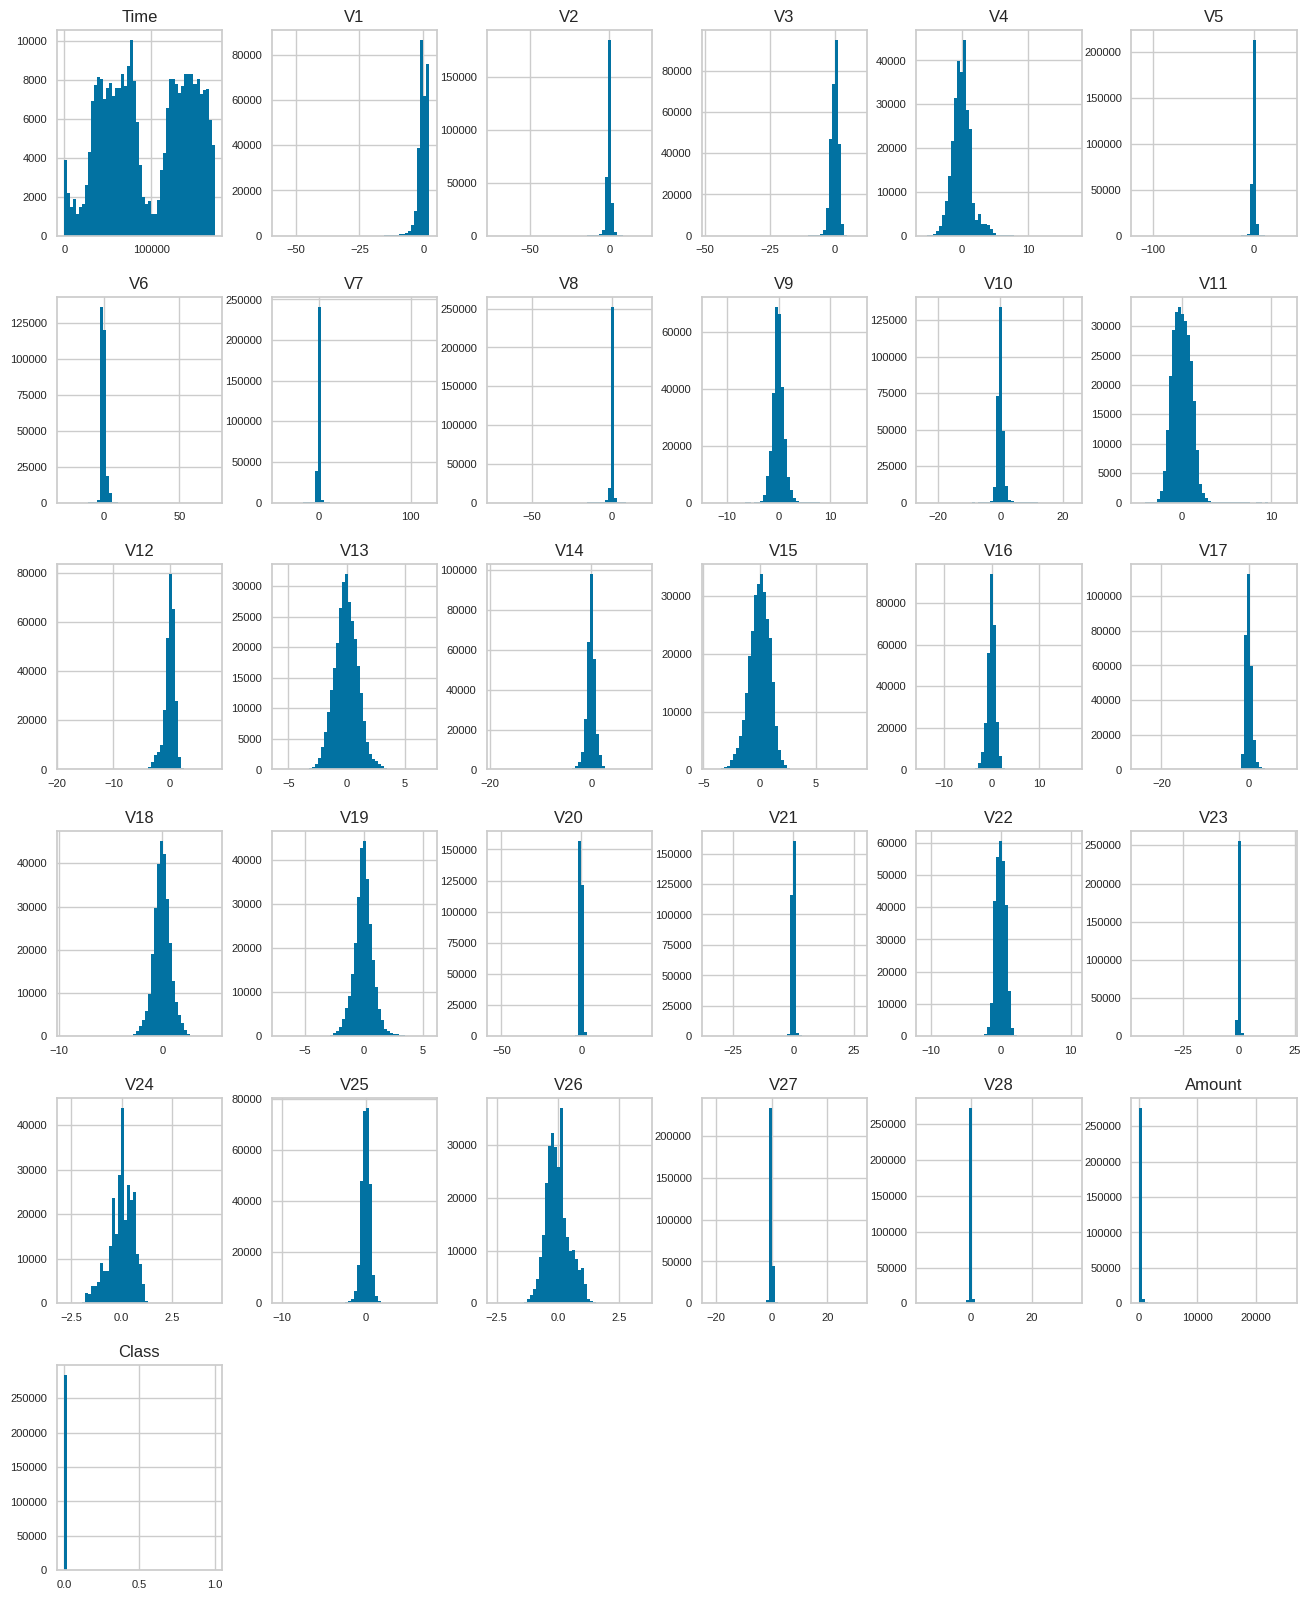

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# The Correlation Matrix

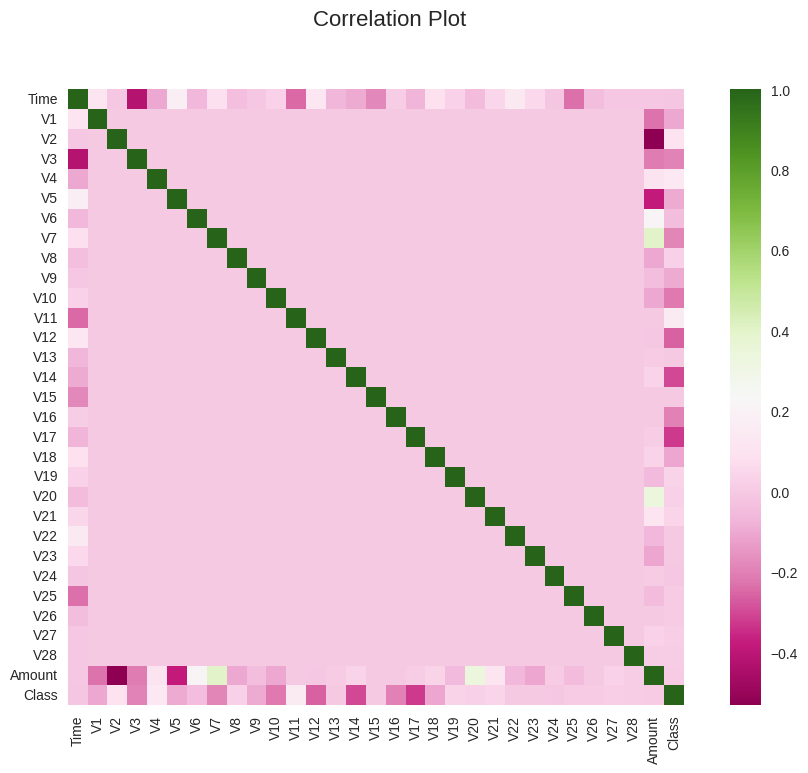

In [ ]:
correlation_matrix = df.corr()
fig = plt.figure(figsize = (12, 8))
fig.suptitle('Correlation Plot', fontsize = 16)
sns.heatmap(correlation_matrix, cmap = "PiYG", square = True)
plt.show()

# 2.Preprocessing

#### *Splitting the Dataset*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis = 1),df['Class'],test_size = .2,random_state = 0)

#### *Normalizing*

In [ ]:
scaler = RobustScaler()
X_train['Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_train['Time'] = scaler.fit_transform(X_train['Time'].values.reshape(-1,1))
X_test['Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1,1))
X_test['Time'] = scaler.transform(X_test['Time'].values.reshape(-1,1))
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
68806,-0.371022,-1.115047,1.035583,0.800712,-1.060398,0.032621,0.853422,-0.614243,-3.231161,1.539948,...,-0.644896,3.020385,-0.539618,0.033156,-0.774946,0.105868,-0.430853,0.229737,-0.070591,-0.125852
40018,-0.524778,1.228473,-0.138826,0.473795,-0.166381,-0.453564,-0.190135,-0.355309,0.048598,0.128943,...,0.032481,-0.172147,-0.574730,0.036834,-0.303782,0.073315,0.810356,-0.069178,0.001890,0.049645
250360,0.823727,1.926148,-0.198628,-0.286727,1.596852,-0.488963,-0.311405,-0.303207,0.035513,1.301312,...,-0.355216,-0.528432,-1.251300,0.455607,-0.120530,-0.361515,-1.099295,0.052747,-0.032622,-0.209985
234820,0.744617,2.046232,0.196183,-1.704650,0.530027,0.177496,-1.443091,0.255403,-0.365759,0.602945,...,-0.216247,0.201104,0.757245,-0.013600,-0.079318,0.234805,-0.098151,0.000028,-0.031675,-0.242664
10001,-0.818970,-0.837077,1.034710,2.333129,3.103776,0.229143,0.501123,0.314283,-0.161583,0.409634,...,-0.134542,-0.363839,-0.458101,0.164097,0.234167,-0.418734,-0.074078,-0.355165,-0.169616,-0.253233


#### *Balancing Data*

In [ ]:
rus = RandomUnderSampler()
ros = RandomOverSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)

# 3.Classification

#### *Decision Tree Classifier*

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.61      0.76      0.68       101

    accuracy                           1.00     56962
   macro avg       0.81      0.88      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56812    49]
 [   24    77]]


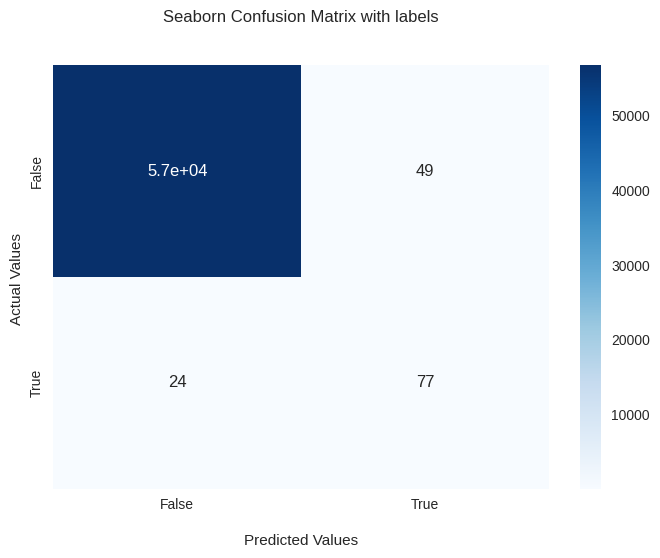

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

cf_matrix = confusion_matrix(y_true = y_test, y_pred = y_predicted)

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.72      0.75      0.73       101

    accuracy                           1.00     56962
   macro avg       0.86      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56831    30]
 [   25    76]]


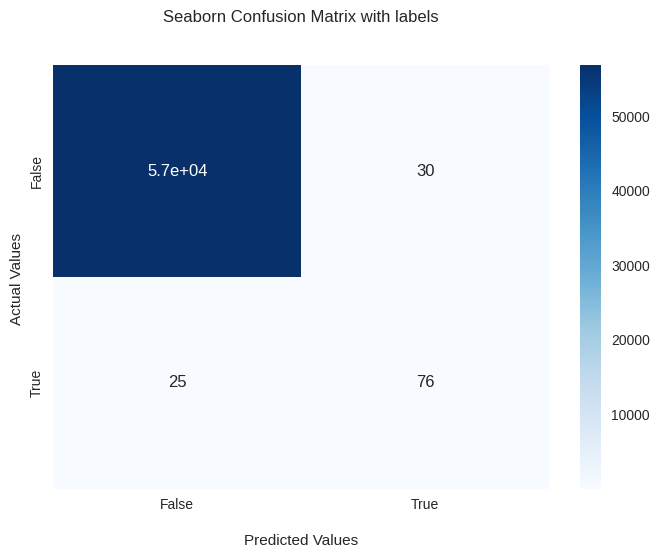

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_ros, y_train_ros)
y_predicted = model.predict(X_test)

cf_matrix = confusion_matrix(y_true = y_test, y_pred = y_predicted)

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


Classification report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56861
           1       0.02      0.93      0.04       101

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962

Confusion matrix:
 [[51720  5141]
 [    7    94]]


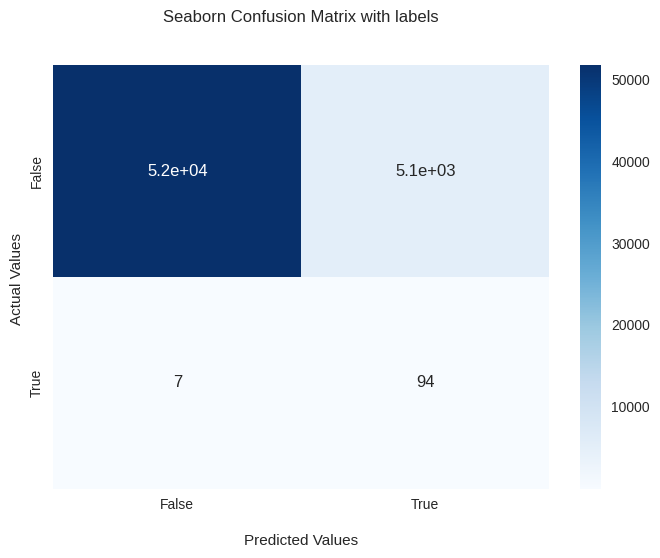

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_rus, y_train_rus)
y_predicted = model.predict(X_test)

cf_matrix = confusion_matrix(y_true = y_test, y_pred = y_predicted)

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


#### *Random Forest Classifier*

In [ ]:
model = RandomForestClassifier(random_state=5)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.93      0.78      0.85       101

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56855     6]
 [   22    79]]


In [ ]:
model = RandomForestClassifier(random_state=5)
model.fit(X_train_ros, y_train_ros)
y_predicted = model.predict(X_test)
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.93      0.80      0.86       101

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56855     6]
 [   20    81]]


In [ ]:
model = RandomForestClassifier(random_state=5)
model.fit(X_train_rus, y_train_rus)
y_predicted = model.predict(X_test)
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56861
           1       0.05      0.92      0.09       101

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

Confusion matrix:
 [[54940  1921]
 [    8    93]]


# Clustering

#### *K-means Clustering*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

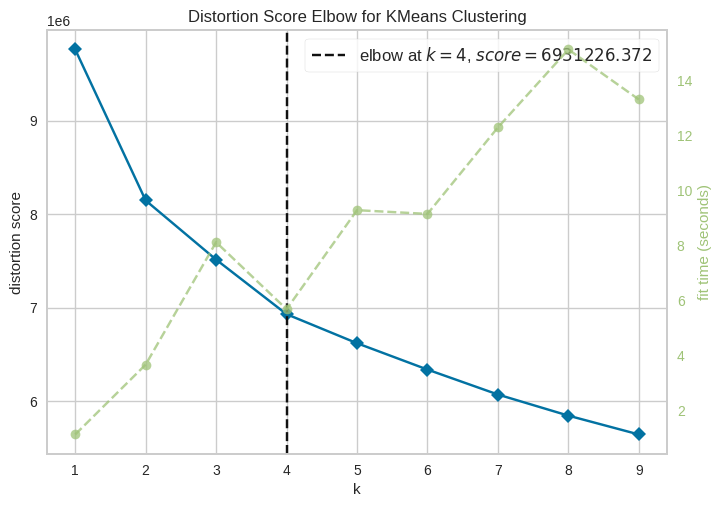

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state = 42)
distortion_visualizer = KElbowVisualizer(model, k = (1, 10))
distortion_visualizer.fit(X_train)
distortion_visualizer.show()

In [ ]:
train,test = train_test_split(df, test_size = 0.2, random_state = 0)

features_train = train.drop(['Class'],axis = 1)
features_train = features_train.values
labels_train = pd.DataFrame(train[['Class']])
labels_train = labels_train.values

features_test = test.drop(['Class'],axis = 1)
features_test = features_test.values
labels_test = pd.DataFrame(test[["Class"]])
labels_test = labels_test.values

In [ ]:
model = KMeans(n_clusters = 2, random_state = 4)
model.fit(features_train)
labels_train_predicted = model.predict(features_train)
labels_test_predicted = model.predict(features_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print('Confusion Matrix:\n',confusion_matrix(labels_test,labels_test_predicted))
print('kmeans_precison_score:', precision_score(labels_test,labels_test_predicted))
print('kmeans_recall_score:', recall_score(labels_test,labels_test_predicted))
print('kmeans_accuracy_score:', accuracy_score(labels_test,labels_test_predicted))
print('kmeans_f1_score:',f1_score(labels_test,labels_test_predicted))

Confusion Matrix:
 [[26208 30653]
 [   35    66]]
kmeans_precison_score: 0.002148507438393177
kmeans_recall_score: 0.6534653465346535
kmeans_accuracy_score: 0.46125487166883183
kmeans_f1_score: 0.004282933160285529


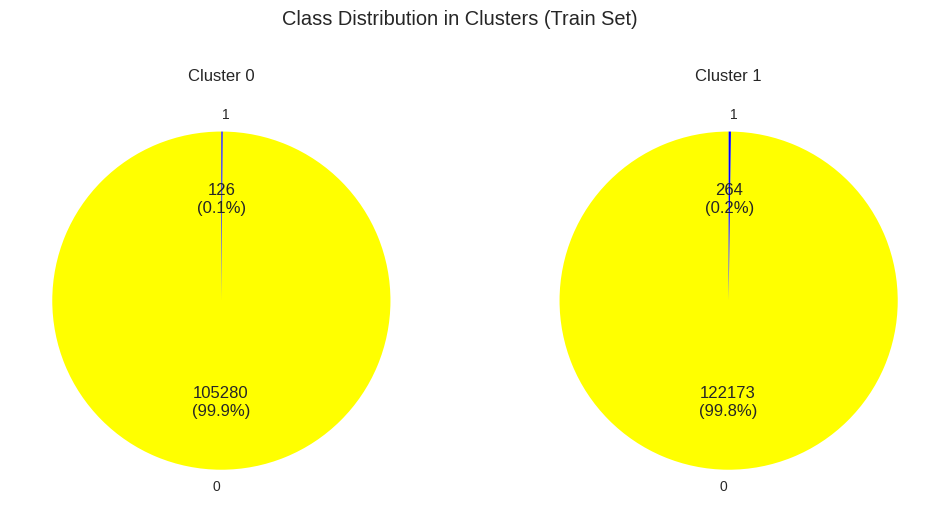

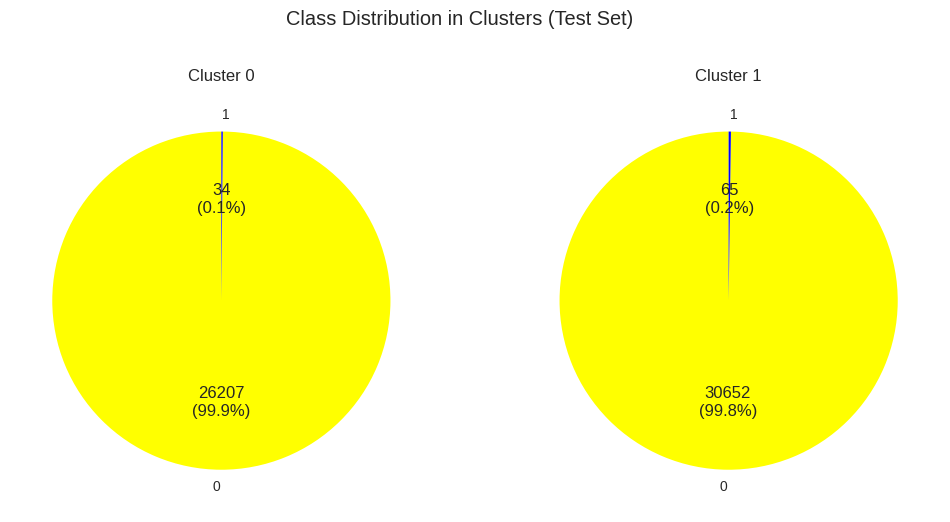

In [ ]:
colors = ['Yellow', 'Blue']
# Function to plot pie chart for a given cluster
def plot_pie(ax, data, cluster_name, colors):
    ax.pie(data, labels=data.index, autopct=lambda pct: "{:d}\n({:.1f}%)".format(int(pct / 100. * np.sum(data)), pct),
           startangle=90, colors=colors)
    ax.set_title(f'Cluster {cluster_name}')

# Create DataFrames for train and test results
train_result = pd.DataFrame({'Class': labels_train.flatten(), 'Cluster': labels_train_predicted})
test_result = pd.DataFrame({'Class': labels_test.flatten(), 'Cluster': labels_test_predicted})

# Calculate counts for train and test sets
train_counts = train_result.groupby(['Cluster', 'Class']).size().unstack(fill_value=0)
test_counts = test_result.groupby(['Cluster', 'Class']).size().unstack(fill_value=0)

# Plotting for the train set
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Class Distribution in Clusters (Train Set)')

for i, ax in enumerate(axes):
    plot_pie(ax, train_counts.iloc[i], i, colors)

plt.show()

# Plotting for the test set
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Class Distribution in Clusters (Test Set)')

for i, ax in enumerate(axes):
    plot_pie(ax, test_counts.iloc[i], i, colors)

plt.show()